In [1]:
# N_z = L Sigma*BR * eff * Acc
# We have N_z, eff, and Acc for EE, EB, and BB
# Sigma*BR does not depend on the region
# We want to evaluate error per region


In [2]:
import numpy as np
import math
import uproot
import matplotlib.pyplot as plt

def RatioError(num, den, eNum, eDen, ifRel):
    '''Assumin C = Num/Den. Takes numerator and denominator together with their errors.
    Asks whether to return the relative or absolute error on C.'''
    # relEr_C^2 = relEr_A^2 + relEr_B^2
    relErDen = float(eDen) / float(den)
    relErNum = float(eNum) / float(num)
    relErC =  math.sqrt(relErDen**2 + relErNum**2)
    if ifRel:
        return relErC
    return relErC*(float(num)/float(den))

def MultError(num, den, eNum, eDen, ifRel):
    '''Assumin C = Num*Den. Takes numerator and denominator together with their errors.
    Asks whether to return the relative or absolute error on C.'''
    # relEr_C^2 = relEr_A^2 + relEr_B^2
    relErDen = float(eDen) / float(den)
    relErNum = float(eNum) / float(num)
    relErC =  math.sqrt(relErDen**2 + relErNum**2)
    if ifRel:
        return relErC
    return relErC*(float(num)*float(den))

def SumError(a,b,eA,eB, ifRel):
    '''Assumin C = a+b. Takes a,b, together with their errors.
    Asks whether to return the relative or absolute error on C'''
    # Er_C^2 = Er_A^2 + Er_B^2
    ErC = math.sqrt(eA**2+eB**2)
    if not ifRel:
        return ErC
    return float(ErC)/float(a+b)



In [3]:
def AccError(N_pass, N_tot, ifRel):
    Acc = float(N_pass)/float(N_tot)
    return Acc, RatioError(N_pass, N_tot, math.sqrt(N_pass), math.sqrt(N_tot), ifRel)


In [4]:
def EffError(N1, N2, eN1, eN2, ifRel):
    '''N1 and N2 are read from the fit, so as their errors. The formula to calculate efficiency is
       2N2/(2N2+N1)
    '''
    # First evaluate the absolute error on den
    eDen = SumError(2*N2,N1,2*eN2,eN1, False)
    eNum = 2*eN2
    return RatioError(2*N2, 2*N2+N1, eNum, eDen, ifRel)


In [4]:
# we need to evaluate N_z and its error properly
# N_z = N1 / (2*eff_HLT(1-eff_HLT)*eff_ID^2)
# Here, N1 is the number read from the HLT fit

0.3646500084808556
0.0007966320344501433
effIDEr [0.017929790977486235, 0.017450007771837178, 0.018889312621308618]
effHLTEr [0.0177179862719056, 0.018105022648843623, 0.018965989882587735]
effID [0.8741508890356648, 0.8810528805639809, 0.8859915956012182]
effHLT [0.86045631825624, 0.8598780114704462, 0.8577380492292327]
Nz [18368.633845928867, 15916.677368707396, 13202.333651792374]
NzEr [1535.4017560777083, 1339.2668986067472, 1144.6892653176342]


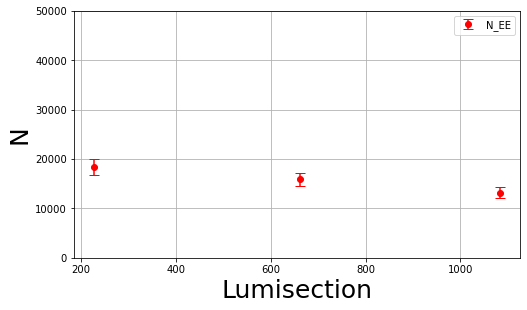

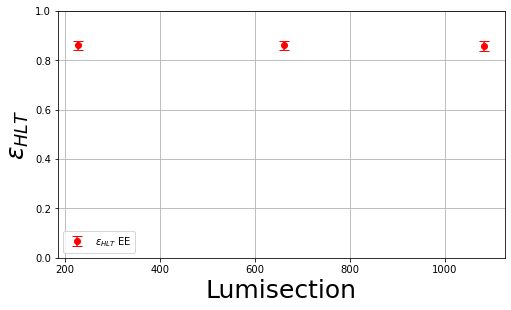

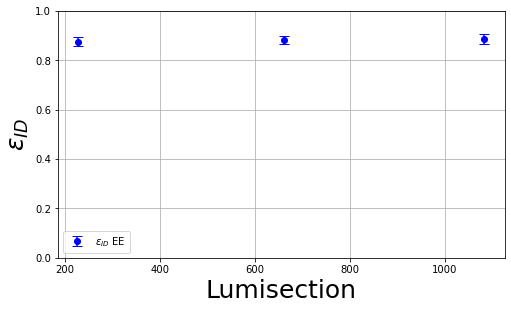

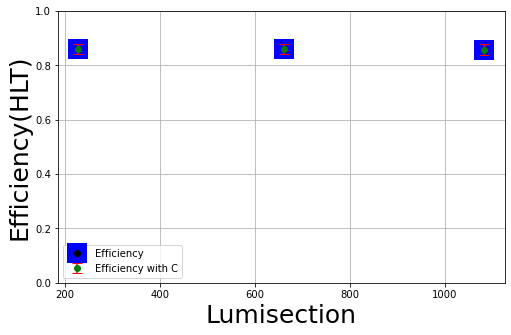

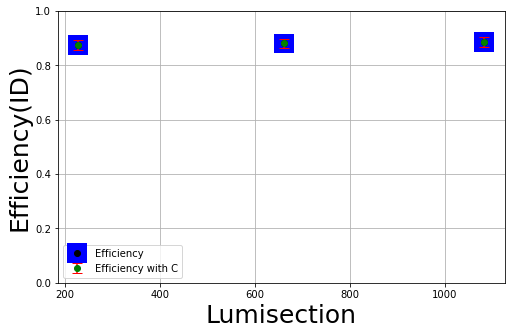

In [15]:
### for EE region ###
#acceptance EE
N_pass = 285929
N_tot = 784119
AccEr = AccError(N_pass, N_tot, False)[1]
Acc = AccError(N_pass, N_tot, False)[0]
print(Acc)
print(AccEr)
c_h = 0.9998

def EffErrorhlt(N1, N2, eN1, eN2, ifRel):
    '''N1 and N2 are read from the fit, so as their errors. The formula to calculate efficiency is
       2N2/(2N2+N1)
    '''
    # First evaluate the absolute error on den
    eDen = SumError(2*N2,N1,2*eN2,eN1, False)
    eNum = 2*eN2
    return RatioError(2*N2, 2*N2+N1, eNum, eDen, ifRel)


def EffErrorid(N1_prime, N2_prime, eN1_prime, eN2_prime, ifRel):
    '''N1 and N2 are read from the fit, so as their errors. The formula to calculate efficiency is
       2N2/(2N2+N1)
    '''
    # First evaluate the absolute error on den
    eDen = SumError(2*N2_prime,N1_prime,2*eN2_prime,eN1_prime, False)
    eNum = 2*eN2_prime
    return  RatioError(2*N2_prime, 2*N2_prime+N1_prime, eNum, eDen, ifRel)


# Load data from text files
def load_data(file_list):
    return [np.loadtxt(file) for file in file_list]


# File names for inputs EE
N1_files = ["N_1hee1.txt", "N_1hee2.txt", "N_1hee3.txt"]
N2_files = ["N_2hee1.txt", "N_2hee2.txt", "N_2hee3.txt"]
N1_prime_files = ["N_1Iee1.txt", "N_1Iee2.txt", "N_1Iee3.txt"]
N2_prime_files = ["N_2Iee1.txt", "N_2Iee2.txt", "N_2Iee3.txt"]

delta_N1_files = ["eN_1hee1.txt", "eN_1hee2.txt", "eN_1hee3.txt"]
delta_N2_files = ["eN_2hee1.txt", "eN_2hee2.txt", "eN_2hee3.txt"]
delta_N1_prime_files = ["eN_1Iee1.txt", "eN_1Iee2.txt", "eN_1Iee3.txt"]
delta_N2_prime_files = ["eN_2Iee1.txt", "eN_2Iee2.txt", "eN_2Iee3.txt"]


# Load all input data for the first set
N1 = load_data(N1_files)
N2 = load_data(N2_files)
N1_prime = load_data(N1_prime_files)
N2_prime = load_data(N2_prime_files)


eN1 = load_data(delta_N1_files)
eN2 = load_data(delta_N2_files)
eN1_prime = load_data(delta_N1_prime_files)
eN2_prime = load_data(delta_N2_prime_files)

effIDeeEr = []
effHLTeeEr = []
effeeID = []
effeeHLT = []
for i in range(len(N1)):
 
    Ereehlt = EffErrorhlt(N1[i], N2[i], eN1[i], eN2[i], False)
    Ereeid = EffErrorid(N1_prime[i], N2_prime[i], eN1_prime[i], eN2_prime[i], False)
    effhlt = 2*N2[i]/(2*N2[i] + N1[i])
    effid =  2*N2_prime[i]/(2*N2_prime[i] + N1_prime[i])
    
    effHLTeeEr.append(Ereehlt)
    effIDeeEr.append(Ereeid)
    effeeHLT.append(effhlt)
    effeeID.append(effid)
    
    
print ("effIDEr",effIDeeEr)
print ("effHLTEr",effHLTeeEr)
print ("effID",effeeID)
print ("effHLT",effeeHLT)


def NZandError(N1, eN1, effeeHLT, effeeID, effHLTeeEr, effIDeeEr, ifRel):
    Nzee = float(N1)/float(2*effeeHLT*(1-effeeHLT)*(effeeID**2))
    
    #1
    A = 2*effeeHLT*(1-effeeHLT)
    eA = MultError(2*(1-effeeHLT),effeeHLT, effHLTeeEr, effHLTeeEr, False)
    B = effeeID**2
    eB = 2*effeeID*effIDeeEr    
    eDen = MultError(A, B, eA, eB, False)
    
    return Nzee, RatioError(N1, A*B, eN1, eDen, ifRel)
Nzee=[]
NzeeEr=[]

for i in range(len(N1)):
 
    Npr = NZandError(N1[i], eN1[i], effeeHLT[i], effeeID[i], effHLTeeEr[i], effIDeeEr[i], False)[0]
    NzErp = NZandError(N1[i], eN1[i], effeeHLT[i], effeeID[i], effHLTeeEr[i], effIDeeEr[i], False)[1]
    Nzee.append(Npr)
    NzeeEr.append(NzErp)
    
print("Nz",Nzee)
print("NzEr",NzeeEr)


# Process the ROOT file
demo_file = "output_resultshlt.root"
with uproot.open(demo_file) as root_file_2:
    uproot_hist = root_file_2["h_mass_2hlt_EE"]
    values, edges_lumisec, edges_mass = uproot_hist.to_numpy()

# Bin ranges for projections
x_bin_start1, x_bin_end1 = 1, 41
x_bin_start2, x_bin_end2 = 41, 81
x_bin_start3, x_bin_end3 = 81, 119

# Calculate midpoints of lumisec bins
lumisec_midpoints = [
    (edges_lumisec[x_bin_start1] + edges_lumisec[x_bin_end1]) / 2,
    (edges_lumisec[x_bin_start2] + edges_lumisec[x_bin_end2]) / 2,
    (edges_lumisec[x_bin_start3] + edges_lumisec[x_bin_end3]) / 2,
]

# Plot the results
plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, Nzee , yerr= NzeeEr ,fmt='o', color='red',  capsize=5,label="N_EE"  )

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("N",fontsize=25)
plt.ylim(0,50000)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, effeeHLT , yerr= effHLTeeEr ,fmt='o', color='red',  capsize=5,label="$\epsilon_{HLT}$ EE")

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("$\epsilon_{HLT}$",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, effeeID , yerr= effIDeeEr ,fmt='o', color='blue',  capsize=5,label="$\epsilon_{ID}$ EE")

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("$\epsilon_{ID}$",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend(loc='lower left')
plt.show()

efficienciesc = [effeeHLT[0]/c_h , effeeHLT[1]/c_h , effeeHLT[2]/c_h]
efficiencyc_errors = [effHLTeeEr[0]/c_h , effHLTeeEr[1]/c_h ,effHLTeeEr[2]/c_h] 

plt.figure(figsize=(8, 5))

plt.errorbar(lumisec_midpoints, effeeHLT , yerr= effHLTeeEr, fmt='o', color='black', label='Efficiency', capsize=10 ,capthick=10, ecolor='blue')
plt.errorbar(lumisec_midpoints, efficienciesc,yerr=efficiencyc_errors, fmt='o', color='green', label='Efficiency with C', capsize=5,capthick=1, ecolor='red')
plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("Efficiency(HLT)",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend(loc='lower left')
plt.show()

efficienciescid = [effeeID[0]/c_h , effeeID[1]/c_h , effeeID[2]/c_h]
efficiencyc_errorsid = [effIDeeEr[0]/c_h , effIDeeEr[1]/c_h ,effIDeeEr[2]/c_h] 

plt.figure(figsize=(8, 5))

plt.errorbar(lumisec_midpoints, effeeID , yerr=effIDeeEr , fmt='o', color='black', label='Efficiency', capsize=10 ,capthick=10, ecolor='blue')
plt.errorbar(lumisec_midpoints, efficienciescid ,yerr=efficiencyc_errorsid, fmt='o', color='green', label='Efficiency with C', capsize=5,capthick=1, ecolor='red')
plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("Efficiency(ID)",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend(loc='lower left')
plt.show()

0.3837835838692851
0.0008229743421554861
effIDEr [0.014616046656399947, 0.01513851701485987, 0.015215722068990224]
effHLTEr [0.016066310823596712, 0.015947194675800774, 0.017580413394801177]
effID [0.8876356271004641, 0.89098569398553, 0.9012297269542933]
effHLT [0.8572305383461933, 0.8515888371126745, 0.8549460768322172]
Nz [18468.20041951002, 15714.007643268738, 13151.700352354908]
NzEr [1326.550344496599, 1115.0402263269355, 998.3425282399741]


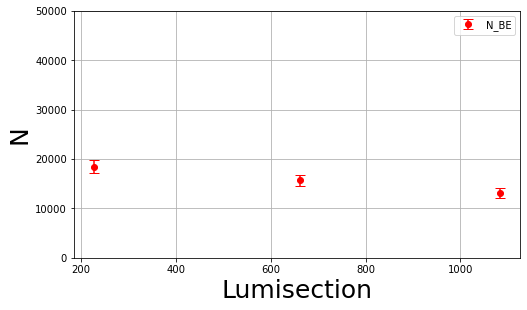

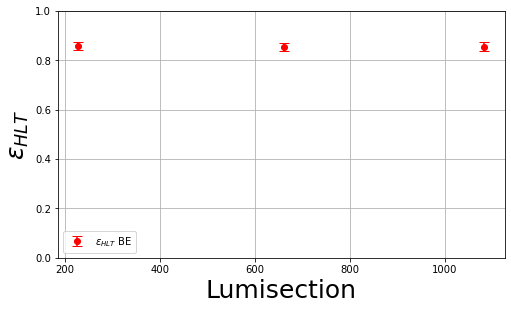

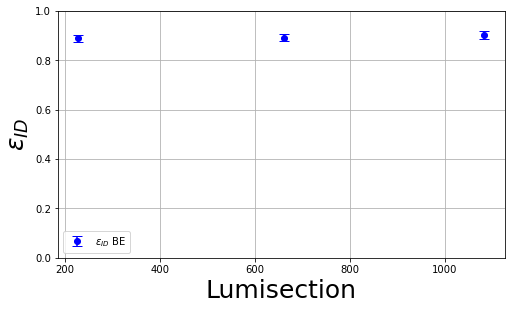

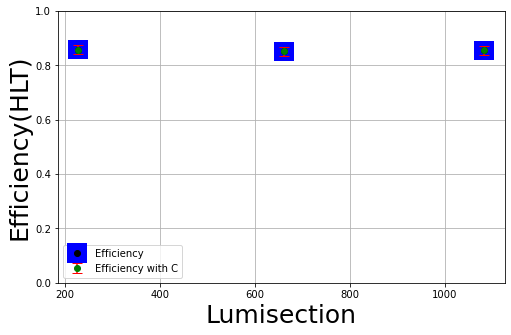

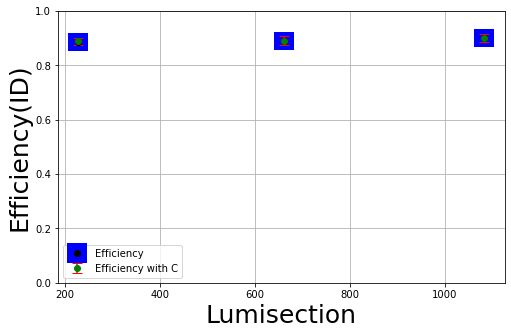

In [17]:
### for BE region ###

#acceptance BE
N_pass = 300932
N_tot = 784119
AccEr = AccError(N_pass, N_tot, False)[1]
Acc = AccError(N_pass, N_tot, False)[0]
print(Acc)
print(AccEr)

def EffErrorhlt(N1, N2, eN1, eN2, ifRel):
    '''N1 and N2 are read from the fit, so as their errors. The formula to calculate efficiency is
       2N2/(2N2+N1)
    '''
    # First evaluate the absolute error on den
    eDen = SumError(2*N2,N1,2*eN2,eN1, False)
    eNum = 2*eN2
    return RatioError(2*N2, 2*N2+N1, eNum, eDen, ifRel)


def EffErrorid(N1_prime, N2_prime, eN1_prime, eN2_prime, ifRel):
    '''N1 and N2 are read from the fit, so as their errors. The formula to calculate efficiency is
       2N2/(2N2+N1)
    '''
    # First evaluate the absolute error on den
    eDen = SumError(2*N2_prime,N1_prime,2*eN2_prime,eN1_prime, False)
    eNum = 2*eN2_prime
    return  RatioError(2*N2_prime, 2*N2_prime+N1_prime, eNum, eDen, ifRel)


# Load data from text files
def load_data(file_list):
    return [np.loadtxt(file) for file in file_list]


# File names for inputs EE
N1_files = ["N_1hbe4.txt", "N_1hbe5.txt", "N_1hbe6.txt"]
N2_files = ["N_2hbe4.txt", "N_2hbe5.txt", "N_2hbe6.txt"]
N1_prime_files = ["N_1Ibe4.txt", "N_1Ibe5.txt", "N_1Ibe6.txt"]
N2_prime_files = ["N_2Ibe4.txt", "N_2Ibe5.txt", "N_2Ibe6.txt"]

delta_N1_files = ["eN_1hbe4.txt", "eN_1hbe5.txt", "eN_1hbe6.txt"]
delta_N2_files = ["eN_2hbe4.txt", "eN_2hbe5.txt", "eN_2hbe6.txt"]
delta_N1_prime_files = ["eN_1Ibe4.txt", "eN_1Ibe5.txt", "eN_1Ibe6.txt"]
delta_N2_prime_files = ["eN_2Ibe4.txt", "eN_2Ibe5.txt", "eN_2Ibe6.txt"]


# Load all input data for the first set
N1 = load_data(N1_files)
N2 = load_data(N2_files)
N1_prime = load_data(N1_prime_files)
N2_prime = load_data(N2_prime_files)


eN1 = load_data(delta_N1_files)
eN2 = load_data(delta_N2_files)
eN1_prime = load_data(delta_N1_prime_files)
eN2_prime = load_data(delta_N2_prime_files)

effIDbeEr = []
effHLTbeEr = []
effbeID = []
effbeHLT = []
for i in range(len(N1)):
 
    Ereehlt = EffErrorhlt(N1[i], N2[i], eN1[i], eN2[i], False)
    Ereeid = EffErrorid(N1_prime[i], N2_prime[i], eN1_prime[i], eN2_prime[i], False)
    effhlt = 2*N2[i]/(2*N2[i] + N1[i])
    effid =  2*N2_prime[i]/(2*N2_prime[i] + N1_prime[i])
    
    effHLTbeEr.append(Ereehlt)
    effIDbeEr.append(Ereeid)
    effbeHLT.append(effhlt)
    effbeID.append(effid)
    
    
print ("effIDEr",effIDbeEr)
print ("effHLTEr",effHLTbeEr)
print ("effID",effbeID)
print ("effHLT",effbeHLT)


def NZandError(N1, eN1, effbeHLT, effbeID, effHLTbeEr, effIDbeEr, ifRel):
    Nzbe = float(N1)/float(2*effbeHLT*(1-effbeHLT)*(effbeID**2))
    
    #1
    A = 2*effbeHLT*(1-effbeHLT)
    eA = MultError(2*(1-effbeHLT),effbeHLT, effHLTbeEr, effHLTbeEr, False)
    B = effbeID**2
    eB = 2*effbeID*effIDbeEr    
    eDen = MultError(A, B, eA, eB, False)
    
    return Nzbe, RatioError(N1, A*B, eN1, eDen, ifRel)
Nzbe=[]
NzbeEr=[]

for i in range(len(N1)):
 
    Npr = NZandError(N1[i], eN1[i], effbeHLT[i], effbeID[i], effHLTbeEr[i], effIDbeEr[i], False)[0]
    NzErp = NZandError(N1[i], eN1[i], effbeHLT[i], effbeID[i], effHLTbeEr[i], effIDbeEr[i], False)[1]
    Nzbe.append(Npr)
    NzbeEr.append(NzErp)
    
print("Nz",Nzbe)
print("NzEr",NzbeEr)


# Process the ROOT file
demo_file = "output_resultshlt.root"
with uproot.open(demo_file) as root_file_2:
    uproot_hist = root_file_2["h_mass_2hlt_EE"]
    values, edges_lumisec, edges_mass = uproot_hist.to_numpy()

# Bin ranges for projections
x_bin_start1, x_bin_end1 = 1, 41
x_bin_start2, x_bin_end2 = 41, 81
x_bin_start3, x_bin_end3 = 81, 119

# Calculate midpoints of lumisec bins
lumisec_midpoints = [
    (edges_lumisec[x_bin_start1] + edges_lumisec[x_bin_end1]) / 2,
    (edges_lumisec[x_bin_start2] + edges_lumisec[x_bin_end2]) / 2,
    (edges_lumisec[x_bin_start3] + edges_lumisec[x_bin_end3]) / 2,
]


plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, Nzbe , yerr= NzbeEr ,fmt='o', color='red',  capsize=5,label="N_BE")

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("N",fontsize=25)
plt.ylim(0,50000)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, effbeHLT , yerr= effHLTbeEr ,fmt='o', color='red',  capsize=5,label="$\epsilon_{HLT}$ BE")

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("$\epsilon_{HLT}$",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, effbeID , yerr= effIDbeEr ,fmt='o', color='blue',  capsize=5,label="$\epsilon_{ID}$ BE")

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("$\epsilon_{ID}$",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

efficienciesc = [effbeHLT[0]/c_h , effbeHLT[1]/c_h , effbeHLT[2]/c_h]
efficiencyc_errors = [effHLTbeEr[0]/c_h , effHLTbeEr[1]/c_h ,effHLTbeEr[2]/c_h] 

plt.figure(figsize=(8, 5))

plt.errorbar(lumisec_midpoints, effbeHLT , yerr= effHLTbeEr, fmt='o', color='black', label='Efficiency', capsize=10 ,capthick=10, ecolor='blue')
plt.errorbar(lumisec_midpoints, efficienciesc,yerr=efficiencyc_errors, fmt='o', color='green', label='Efficiency with C', capsize=5,capthick=1, ecolor='red')
plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("Efficiency(HLT)",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend(loc='lower left')
plt.show()

efficienciescid = [effbeID[0]/c_h , effbeID[1]/c_h , effbeID[2]/c_h]
efficiencyc_errorsid = [effIDbeEr[0]/c_h , effIDbeEr[1]/c_h ,effIDbeEr[2]/c_h] 

plt.figure(figsize=(8, 5))

plt.errorbar(lumisec_midpoints, effbeID , yerr=effIDbeEr , fmt='o', color='black', label='Efficiency', capsize=10 ,capthick=10, ecolor='blue')
plt.errorbar(lumisec_midpoints, efficienciescid ,yerr=efficiencyc_errorsid, fmt='o', color='green', label='Efficiency with C', capsize=5,capthick=1, ecolor='red')
plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("Efficiency(ID)",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend(loc='lower left')
plt.show()


0.25156640764985927
0.0006336687418369341
effIDEr [0.01553685295210545, 0.01573768362118684, 0.016269482345629308]
effHLTEr [0.017325928651799383, 0.017669643236091152, 0.019520746140883338]
effID [0.8924555067130452, 0.89834286737975, 0.8971770524218334]
effHLT [0.868068650936995, 0.8602885019870462, 0.8585289534653053]
Nz [14669.785285257218, 12394.891160001183, 10278.428115135372]
NzEr [1190.1812953749927, 970.8672807691694, 876.4677309948014]


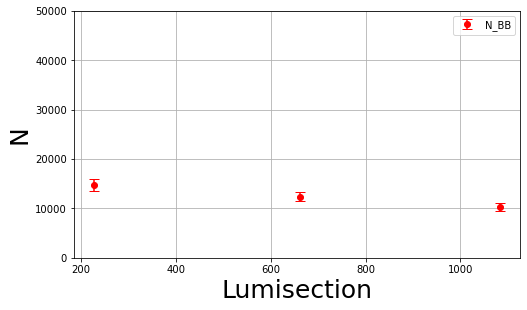

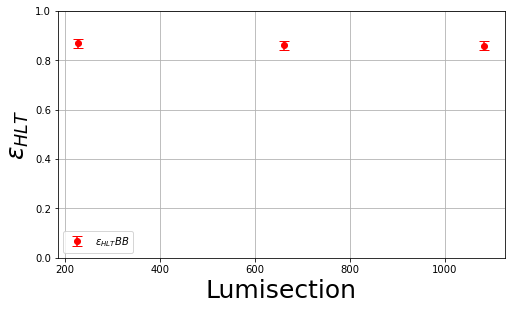

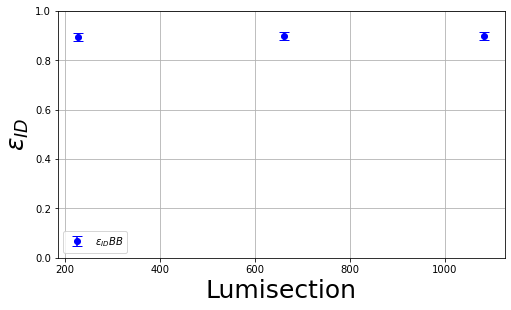

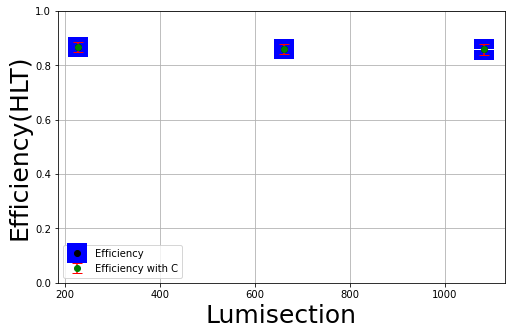

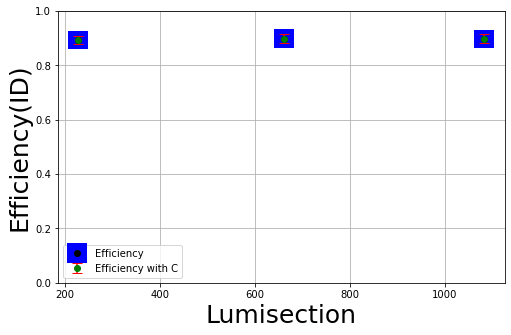

In [19]:
### for BB region ###
#acceptance BB

N_pass = 197258
N_tot = 784119
AccEr = AccError(N_pass, N_tot, False)[1]
Acc = AccError(N_pass, N_tot, False)[0]
print(Acc)
print(AccEr)

def EffErrorhlt(N1, N2, eN1, eN2, ifRel):
    '''N1 and N2 are read from the fit, so as their errors. The formula to calculate efficiency is
       2N2/(2N2+N1)
    '''
    # First evaluate the absolute error on den
    eDen = SumError(2*N2,N1,2*eN2,eN1, False)
    eNum = 2*eN2
    return RatioError(2*N2, 2*N2+N1, eNum, eDen, ifRel)


def EffErrorid(N1_prime, N2_prime, eN1_prime, eN2_prime, ifRel):
    '''N1 and N2 are read from the fit, so as their errors. The formula to calculate efficiency is
       2N2/(2N2+N1)
    '''
    # First evaluate the absolute error on den
    eDen = SumError(2*N2_prime,N1_prime,2*eN2_prime,eN1_prime, False)
    eNum = 2*eN2_prime
    return  RatioError(2*N2_prime, 2*N2_prime+N1_prime, eNum, eDen, ifRel)


# Load data from text files
def load_data(file_list):
    return [np.loadtxt(file) for file in file_list]


# File names for inputs EE
N1_files = ["N_1hbb7.txt", "N_1hbb8.txt", "N_1hbb9.txt"]
N2_files = ["N_2hbb7.txt", "N_2hbb8.txt", "N_2hbb9.txt"]
N1_prime_files = ["N_1Ibb9.txt", "N_1Ibb10.txt", "N_1Ibb11.txt"]
N2_prime_files = ["N_2Ibb9.txt", "N_2Ibb10.txt", "N_2Ibb11.txt"]

delta_N1_files = ["eN_1hbb7.txt", "eN_1hbb8.txt", "eN_1hbb9.txt"]
delta_N2_files = ["eN_2hbb7.txt", "eN_2hbb8.txt", "eN_2hbb9.txt"]
delta_N1_prime_files = ["eN_1Ibb9.txt", "eN_1Ibb10.txt", "eN_1Ibb11.txt"]
delta_N2_prime_files = ["eN_2Ibb9.txt", "eN_2Ibb10.txt", "eN_2Ibb11.txt"]


# Load all input data for the first set
N1 = load_data(N1_files)
N2 = load_data(N2_files)
N1_prime = load_data(N1_prime_files)
N2_prime = load_data(N2_prime_files)


eN1 = load_data(delta_N1_files)
eN2 = load_data(delta_N2_files)
eN1_prime = load_data(delta_N1_prime_files)
eN2_prime = load_data(delta_N2_prime_files)

effIDbbEr = []
effHLTbbEr = []
effbbID = []
effbbHLT = []
for i in range(len(N1)):
 
    Ereehlt = EffErrorhlt(N1[i], N2[i], eN1[i], eN2[i], False)
    Ereeid = EffErrorid(N1_prime[i], N2_prime[i], eN1_prime[i], eN2_prime[i], False)
    effhlt = 2*N2[i]/(2*N2[i] + N1[i])
    effid =  2*N2_prime[i]/(2*N2_prime[i] + N1_prime[i])
    
    effHLTbbEr.append(Ereehlt)
    effIDbbEr.append(Ereeid)
    effbbHLT.append(effhlt)
    effbbID.append(effid)
    
    
print ("effIDEr",effIDbbEr)
print ("effHLTEr",effHLTbbEr)
print ("effID",effbbID)
print ("effHLT",effbbHLT)


def NZandError(N1, eN1, effbbHLT, effbbID, effHLTbbEr, effIDbbEr, ifRel):
    Nzbb = float(N1)/float(2*effbbHLT*(1-effbbHLT)*(effbbID**2))
    
    #1
    A = 2*effbbHLT*(1-effbbHLT)
    eA = MultError(2*(1-effbbHLT),effbbHLT, effHLTbbEr, effHLTbbEr, False)
    B = effbbID**2
    eB = 2*effbbID*effIDbbEr    
    eDen = MultError(A, B, eA, eB, False)
    
    return Nzbb, RatioError(N1, A*B, eN1, eDen, ifRel)
Nzbb=[]
NzbbEr=[]

for i in range(len(N1)):
 
    Npr = NZandError(N1[i], eN1[i], effbbHLT[i], effbbID[i], effHLTbbEr[i], effIDbbEr[i], False)[0]
    NzErp = NZandError(N1[i], eN1[i], effbbHLT[i], effbbID[i], effHLTbbEr[i], effIDbbEr[i], False)[1]
    Nzbb.append(Npr)
    NzbbEr.append(NzErp)
    
print("Nz",Nzbb)
print("NzEr",NzbbEr)

# Process the ROOT file
demo_file = "output_resultshlt.root"
with uproot.open(demo_file) as root_file_2:
    uproot_hist = root_file_2["h_mass_2hlt_EE"]
    values, edges_lumisec, edges_mass = uproot_hist.to_numpy()

# Bin ranges for projections
x_bin_start1, x_bin_end1 = 1, 41
x_bin_start2, x_bin_end2 = 41, 81
x_bin_start3, x_bin_end3 = 81, 119

# Calculate midpoints of lumisec bins
lumisec_midpoints = [
    (edges_lumisec[x_bin_start1] + edges_lumisec[x_bin_end1]) / 2,
    (edges_lumisec[x_bin_start2] + edges_lumisec[x_bin_end2]) / 2,
    (edges_lumisec[x_bin_start3] + edges_lumisec[x_bin_end3]) / 2,
]

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, Nzbb , yerr= NzbbEr ,fmt='o', color='red',  capsize=5,label="N_BB")

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("N",fontsize=25)
plt.ylim(0,50000)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, effbbHLT , yerr= effHLTbbEr ,fmt='o', color='red',  capsize=5,label="$\epsilon_{HLT} BB$")

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("$\epsilon_{HLT}$",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, effbbID , yerr= effIDbbEr ,fmt='o', color='blue',  capsize=5,label="$\epsilon_{ID} BB$")

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("$\epsilon_{ID}$",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

efficienciesc = [effbbHLT[0]/c_h , effbbHLT[1]/c_h , effbbHLT[2]/c_h]
efficiencyc_errors = [effHLTbbEr[0]/c_h , effHLTbbEr[1]/c_h ,effHLTbbEr[2]/c_h] 

plt.figure(figsize=(8, 5))

plt.errorbar(lumisec_midpoints, effbbHLT , yerr= effHLTbbEr, fmt='o', color='black', label='Efficiency', capsize=10 ,capthick=10, ecolor='blue')
plt.errorbar(lumisec_midpoints, efficienciesc,yerr=efficiencyc_errors, fmt='o', color='green', label='Efficiency with C', capsize=5,capthick=1, ecolor='red')
plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("Efficiency(HLT)",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend(loc='lower left')
plt.show()

efficienciescid = [effbbID[0]/c_h , effbbID[1]/c_h , effbbID[2]/c_h]
efficiencyc_errorsid = [effIDbbEr[0]/c_h , effIDbbEr[1]/c_h ,effIDbbEr[2]/c_h] 

plt.figure(figsize=(8, 5))

plt.errorbar(lumisec_midpoints, effbbID , yerr=effIDbbEr , fmt='o', color='black', label='Efficiency', capsize=10 ,capthick=10, ecolor='blue')
plt.errorbar(lumisec_midpoints, efficienciescid ,yerr=efficiencyc_errorsid, fmt='o', color='green', label='Efficiency with C', capsize=5,capthick=1, ecolor='red')
plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("Efficiency(ID)",fontsize=25)
plt.ylim(0,1)
plt.grid()
plt.legend(loc='lower left')
plt.show()


In [22]:
def SumError(a,b,c,eA,eB,eC, ifRel):
    '''Assumin C = a+b+c. Takes a,b, together with their errors.
    Asks whether to return the relative or absolute error on C'''
    # Er_C^2 = Er_A^2 + Er_B^2 + Er_c^2 
    ErC = math.sqrt(eA**2+eB**2+eC**2)
    if not ifRel:
        return ErC
    return float(ErC)/float(a+b+c)


#acceptance tot
N_pass = 784119
N_tot = 2688599
AccEr = AccError(N_pass, N_tot, False)[1]
Acc = AccError(N_pass, N_tot, False)[0]


def LumiAndError(Nzee, NzeeEr, Nzbe, NzbeEr, Nzbb, NzbbEr, Acc, AccEr, 
                 effeeHLT, effbeHLT, effbbHLT, effeeID, effbeID, effbbID, 
                 effHLTeeEr, effHLTbeEr, effHLTbbEr, effIDeeEr, effIDbeEr, effIDbbEr, 
                 ifRel):
    lumi = []
    Erlumi = []
    sigmaBr = 2.073
    sigmaBrE = 0.024
    A_ee = 0.36
    dA_ee = 0.000796
    A_eb = 0.38
    dA_eb = 0.000822
    A_bb = 0.25
    dA_bb = 0.000633

    # Loop over i values
    for i in range(3):  # i = 0, 1, 2
        # Calculate Lumi
        Lumi = float(Nzee[i] + Nzbe[i] + Nzbb[i]) / float(sigmaBr * Acc * (((effeeHLT[i] * effeeID[i]) * A_ee ) + ((effbeHLT[i] * effbeID[i]) * A_eb) + ((effbbHLT[i] * effbbID[i]) * A_bb)))
            
        
        lumi.append(Lumi)

        # Calculate errors
        A = sigmaBr * Acc
        eA = MultError(sigmaBr, Acc, sigmaBrE, AccEr, False)

        B11 = effeeHLT[i] * effeeID[i]
        eB11 = MultError(effeeHLT[i], effeeID[i], effHLTeeEr[i], effIDeeEr[i], False)
        B12 = A_ee
        eB12 = dA_ee
        B1 = B11 * B12
        eB1 = MultError(B11, B12, eB11, eB12, False)

        C11 = effbeHLT[i] * effbeID[i]
        eC11 = MultError(effbeHLT[i], effbeID[i], effHLTbeEr[i], effIDbeEr[i], False)
        C12 = A_eb
        eC12 = dA_eb
        C1 = C11 * C12
        eC1 = MultError(C11, C12, eC11, eC12, False)

        D11 = effbbHLT[i] * effbbID[i]
        eD11 = MultError(effbbHLT[i], effbbID[i], effHLTbbEr[i], effIDbbEr[i], False)
        D12 = A_bb
        eD12 = dA_bb
        D1 = D11 * D12
        eD1 = MultError(D11, D12, eD11, eD12, False)

        S = B1 + C1 + D1
        eS = SumError(B1, C1, D1, eB1, eC1, eD1, False)
        den = S * A
        eDen = MultError(S, A, eS, eA, False)
        Er = RatioError(Nzee[i] + Nzbe[i] + Nzbb[i], den, NzeeEr[i] + NzbeEr[i] + NzbbEr[i], eDen, ifRel)
        Erlumi.append(Er)
    
    return lumi, Erlumi


lumi_final = LumiAndError(Nzee, NzeeEr, Nzbe, NzbeEr, Nzbb, NzbbEr, Acc, AccEr, 
                 effeeHLT, effbeHLT, effbbHLT, effeeID, effbeID, effbbID, 
                 effHLTeeEr, effHLTbeEr, effHLTbbEr, effIDeeEr, effIDbeEr, effIDbbEr, 
                 False)[0]
err_lumi =  LumiAndError(Nzee, NzeeEr, Nzbe, NzbeEr, Nzbb, NzbbEr, Acc, AccEr, 
                 effeeHLT, effbeHLT, effbbHLT, effeeID, effbeID, effbbID, 
                 effHLTeeEr, effHLTbeEr, effHLTbbEr, effIDeeEr, effIDbeEr, effIDbbEr, 
                 False)[1]
bril =  [114618.486, 97972.294, 81904.476]

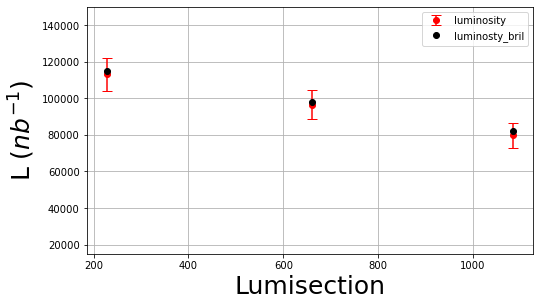

In [23]:
# Process the ROOT file
demo_file = "output_resultshlt.root"
with uproot.open(demo_file) as root_file_2:
    uproot_hist = root_file_2["h_mass_2hlt_EE"]
    values, edges_lumisec, edges_mass = uproot_hist.to_numpy()

# Bin ranges for projections
x_bin_start1, x_bin_end1 = 1, 41
x_bin_start2, x_bin_end2 = 41, 81
x_bin_start3, x_bin_end3 = 81, 119

# Calculate midpoints of lumisec bins
lumisec_midpoints = [
    (edges_lumisec[x_bin_start1] + edges_lumisec[x_bin_end1]) / 2,
    (edges_lumisec[x_bin_start2] + edges_lumisec[x_bin_end2]) / 2,
    (edges_lumisec[x_bin_start3] + edges_lumisec[x_bin_end3]) / 2,
]

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, lumi_final , yerr=err_lumi  ,fmt='o', color='red',  capsize=5,label="luminosity")
plt.errorbar(lumisec_midpoints,  bril ,fmt='o', color='black',  capsize=5,label="luminosty_bril")


plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("L $(nb^{-1})$",fontsize=25)
plt.ylim(15000,150000)
plt.grid()
plt.legend()
plt.show()

effIDEr [0.017929790977486235, 0.017450007771837178, 0.018889312621308618]
effHLTEr [0.0177179862719056, 0.018105022648843623, 0.018965989882587735]
effID [0.8741508890356648, 0.8810528805639809, 0.8859915956012182]
effHLT [0.86045631825624, 0.8598780114704462, 0.8577380492292327]
Nz [24133.45228562349, 20370.695079441164, 16503.94092546473]
NzEr [2264.7784933474613, 1917.757226826078, 1849.5442311072131]


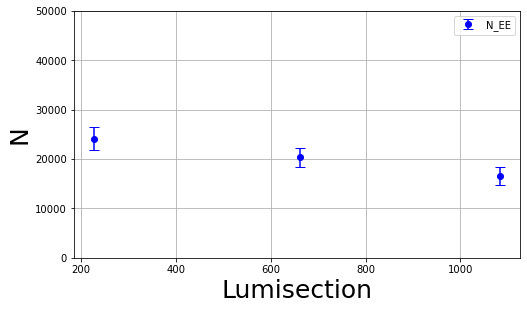

In [24]:

def SumError(a,b,eA,eB, ifRel):
    '''Assumin C = a+b. Takes a,b, together with their errors.
    Asks whether to return the relative or absolute error on C'''
    # Er_C^2 = Er_A^2 + Er_B^2
    ErC = math.sqrt(eA**2+eB**2)
    if not ifRel:
        return ErC
    return float(ErC)/float(a+b)

# Load data from text files
def load_data(file_list):
    return [np.loadtxt(file) for file in file_list]


# File names for inputs EE
N1_files = ["N_1hee1.txt", "N_1hee2.txt", "N_1hee3.txt"]
N2_files = ["N_2hee1.txt", "N_2hee2.txt", "N_2hee3.txt"]
N1_prime_files = ["N_1Iee1.txt", "N_1Iee2.txt", "N_1Iee3.txt"]
N2_prime_files = ["N_2Iee1.txt", "N_2Iee2.txt", "N_2Iee3.txt"]

delta_N1_files = ["eN_1hee1.txt", "eN_1hee2.txt", "eN_1hee3.txt"]
delta_N2_files = ["eN_2hee1.txt", "eN_2hee2.txt", "eN_2hee3.txt"]
delta_N1_prime_files = ["eN_1Iee1.txt", "eN_1Iee2.txt", "eN_1Iee3.txt"]
delta_N2_prime_files = ["eN_2Iee1.txt", "eN_2Iee2.txt", "eN_2Iee3.txt"]


# Load all input data for the first set
N1 = load_data(N1_files)
N2 = load_data(N2_files)
N1_prime = load_data(N1_prime_files)
N2_prime = load_data(N2_prime_files)


eN1 = load_data(delta_N1_files)
eN2 = load_data(delta_N2_files)
eN1_prime = load_data(delta_N1_prime_files)
eN2_prime = load_data(delta_N2_prime_files)

effIDeeEr = []
effHLTeeEr = []
effeeID = []
effeeHLT = []
for i in range(len(N1)):
 
    Ereehlt = EffErrorhlt(N1[i], N2[i], eN1[i], eN2[i], False)
    Ereeid = EffErrorid(N1_prime[i], N2_prime[i], eN1_prime[i], eN2_prime[i], False)
    effhlt = 2*N2[i]/(2*N2[i] + N1[i])
    effid =  2*N2_prime[i]/(2*N2_prime[i] + N1_prime[i])
    
    effHLTeeEr.append(Ereehlt)
    effIDeeEr.append(Ereeid)
    effeeHLT.append(effhlt)
    effeeID.append(effid)
    
    
print ("effIDEr",effIDeeEr)
print ("effHLTEr",effHLTeeEr)
print ("effID",effeeID)
print ("effHLT",effeeHLT)


def NZandError(N1_prime, eN1_prime, effeeHLT, effeeID, effHLTeeEr, effIDeeEr, ifRel):
    Nzeeid = float(N1_prime)/float(2*effeeID*(1-effeeID)*(effeeID**2))
    
    #1
    A = 2*effeeID*(1-effeeID)
    eA = MultError(2*(1-effeeID),effeeID, effIDeeEr, effIDeeEr, False)
    B = effeeID**2
    eB = 2*effeeID*effIDeeEr    
    eDen = MultError(A, B, eA, eB, False)
    
    return Nzeeid, RatioError(N1_prime, A*B, eN1_prime, eDen, ifRel)
Nzeeid=[]
NzeeidEr=[]

for i in range(len(N1_prime)):
 
    Npr = NZandError(N1_prime[i], eN1_prime[i], effeeHLT[i], effeeID[i], effHLTeeEr[i], effIDeeEr[i], False)[0]
    NzErp = NZandError(N1_prime[i], eN1_prime[i], effeeHLT[i], effeeID[i], effHLTeeEr[i], effIDeeEr[i], False)[1]
    Nzeeid.append(Npr)
    NzeeidEr.append(NzErp)
    
print("Nz",Nzeeid)
print("NzEr",NzeeidEr)

# Process the ROOT file
demo_file = "output_resultshlt.root"
with uproot.open(demo_file) as root_file_2:
    uproot_hist = root_file_2["h_mass_2hlt_EE"]
    values, edges_lumisec, edges_mass = uproot_hist.to_numpy()

# Bin ranges for projections
x_bin_start1, x_bin_end1 = 1, 41
x_bin_start2, x_bin_end2 = 41, 81
x_bin_start3, x_bin_end3 = 81, 119

# Calculate midpoints of lumisec bins
lumisec_midpoints = [
    (edges_lumisec[x_bin_start1] + edges_lumisec[x_bin_end1]) / 2,
    (edges_lumisec[x_bin_start2] + edges_lumisec[x_bin_end2]) / 2,
    (edges_lumisec[x_bin_start3] + edges_lumisec[x_bin_end3]) / 2,
]

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, Nzeeid , yerr= NzeeidEr ,fmt='o', color='blue',  capsize=5,label="N_EE")

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("N",fontsize=25)
plt.ylim(0,50000)
plt.grid()
plt.legend()
plt.show()

effIDEr [0.014616046656399947, 0.01513851701485987, 0.015215722068990224]
effHLTEr [0.016066310823596712, 0.015947194675800774, 0.017580413394801177]
effID [0.8876356271004641, 0.89098569398553, 0.9012297269542933]
effHLT [0.8572305383461933, 0.8515888371126745, 0.8549460768322172]
Nz [23020.994996896046, 19309.37405803906, 15975.007157943239]
NzEr [1850.8014072235183, 1639.2515502078188, 1469.7326459863336]


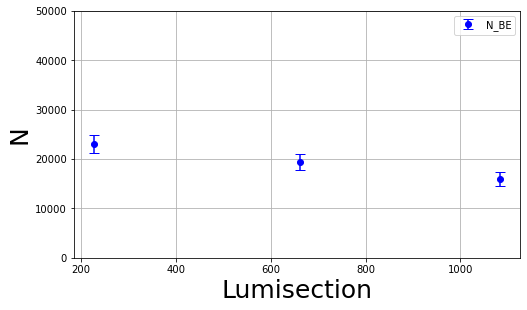

In [25]:
def load_data(file_list):
    return [np.loadtxt(file) for file in file_list]


# File names for inputs EE
N1_files = ["N_1hbe4.txt", "N_1hbe5.txt", "N_1hbe6.txt"]
N2_files = ["N_2hbe4.txt", "N_2hbe5.txt", "N_2hbe6.txt"]
N1_prime_files = ["N_1Ibe4.txt", "N_1Ibe5.txt", "N_1Ibe6.txt"]
N2_prime_files = ["N_2Ibe4.txt", "N_2Ibe5.txt", "N_2Ibe6.txt"]

delta_N1_files = ["eN_1hbe4.txt", "eN_1hbe5.txt", "eN_1hbe6.txt"]
delta_N2_files = ["eN_2hbe4.txt", "eN_2hbe5.txt", "eN_2hbe6.txt"]
delta_N1_prime_files = ["eN_1Ibe4.txt", "eN_1Ibe5.txt", "eN_1Ibe6.txt"]
delta_N2_prime_files = ["eN_2Ibe4.txt", "eN_2Ibe5.txt", "eN_2Ibe6.txt"]

# Load all input data for the first set
N1 = load_data(N1_files)
N2 = load_data(N2_files)
N1_prime = load_data(N1_prime_files)
N2_prime = load_data(N2_prime_files)


eN1 = load_data(delta_N1_files)
eN2 = load_data(delta_N2_files)
eN1_prime = load_data(delta_N1_prime_files)
eN2_prime = load_data(delta_N2_prime_files)

effIDeeEr = []
effHLTeeEr = []
effeeID = []
effeeHLT = []
for i in range(len(N1)):
 
    Ereehlt = EffErrorhlt(N1[i], N2[i], eN1[i], eN2[i], False)
    Ereeid = EffErrorid(N1_prime[i], N2_prime[i], eN1_prime[i], eN2_prime[i], False)
    effhlt = 2*N2[i]/(2*N2[i] + N1[i])
    effid =  2*N2_prime[i]/(2*N2_prime[i] + N1_prime[i])
    
    effHLTeeEr.append(Ereehlt)
    effIDeeEr.append(Ereeid)
    effeeHLT.append(effhlt)
    effeeID.append(effid)
    
    
print ("effIDEr",effIDeeEr)
print ("effHLTEr",effHLTeeEr)
print ("effID",effeeID)
print ("effHLT",effeeHLT)


def NZandError(N1_prime, eN1_prime, effeeHLT, effeeID, effHLTeeEr, effIDeeEr, ifRel):
    Nzbeid = float(N1_prime)/float(2*effeeID*(1-effeeID)*(effeeID**2))
    
    #1
    A = 2*effeeID*(1-effeeID)
    eA = MultError(2*(1-effeeID),effeeID, effIDeeEr, effIDeeEr, False)
    B = effeeID**2
    eB = 2*effeeID*effIDeeEr    
    eDen = MultError(A, B, eA, eB, False)
    
    return Nzbeid, RatioError(N1_prime, A*B, eN1_prime, eDen, ifRel)
Nzbeid=[]
NzbeidEr=[]

for i in range(len(N1_prime)):
 
    Npr = NZandError(N1_prime[i], eN1_prime[i], effeeHLT[i], effeeID[i], effHLTeeEr[i], effIDeeEr[i], False)[0]
    NzErp = NZandError(N1_prime[i], eN1_prime[i], effeeHLT[i], effeeID[i], effHLTeeEr[i], effIDeeEr[i], False)[1]
    Nzbeid.append(Npr)
    NzbeidEr.append(NzErp)
    
print("Nz",Nzbeid)
print("NzEr",NzbeidEr)
# Process the ROOT file
demo_file = "output_resultshlt.root"
with uproot.open(demo_file) as root_file_2:
    uproot_hist = root_file_2["h_mass_2hlt_EE"]
    values, edges_lumisec, edges_mass = uproot_hist.to_numpy()

# Bin ranges for projections
x_bin_start1, x_bin_end1 = 1, 41
x_bin_start2, x_bin_end2 = 41, 81
x_bin_start3, x_bin_end3 = 81, 119

# Calculate midpoints of lumisec bins
lumisec_midpoints = [
    (edges_lumisec[x_bin_start1] + edges_lumisec[x_bin_end1]) / 2,
    (edges_lumisec[x_bin_start2] + edges_lumisec[x_bin_end2]) / 2,
    (edges_lumisec[x_bin_start3] + edges_lumisec[x_bin_end3]) / 2,
]

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, Nzbeid , yerr= NzbeidEr ,fmt='o', color='blue',  capsize=5,label="N_BE")

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("N",fontsize=25)
plt.ylim(0,50000)
plt.grid()
plt.legend()
plt.show()

effIDEr [0.01553685295210545, 0.01573768362118684, 0.016269482345629308]
effHLTEr [0.017325928651799383, 0.017669643236091152, 0.019520746140883338]
effID [0.8924555067130452, 0.89834286737975, 0.8971770524218334]
effHLT [0.868068650936995, 0.8602885019870462, 0.8585289534653053]
Nz [17726.384764714232, 14774.556521288067, 12373.266263675741]
NzEr [1632.0701956417433, 1383.9829591551777, 1215.4330826850412]


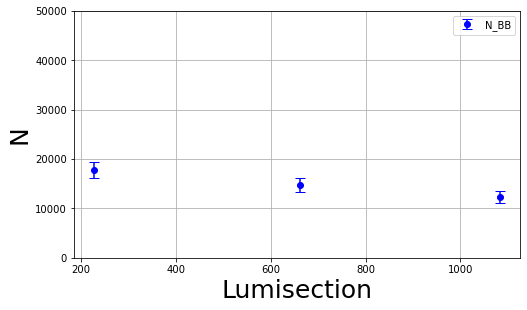

In [26]:
# Load data from text files
def load_data(file_list):
    return [np.loadtxt(file) for file in file_list]


# File names for inputs EE
N1_files = ["N_1hbb7.txt", "N_1hbb8.txt", "N_1hbb9.txt"]
N2_files = ["N_2hbb7.txt", "N_2hbb8.txt", "N_2hbb9.txt"]
N1_prime_files = ["N_1Ibb9.txt", "N_1Ibb10.txt", "N_1Ibb11.txt"]
N2_prime_files = ["N_2Ibb9.txt", "N_2Ibb10.txt", "N_2Ibb11.txt"]

delta_N1_files = ["eN_1hbb7.txt", "eN_1hbb8.txt", "eN_1hbb9.txt"]
delta_N2_files = ["eN_2hbb7.txt", "eN_2hbb8.txt", "eN_2hbb9.txt"]
delta_N1_prime_files = ["eN_1Ibb9.txt", "eN_1Ibb10.txt", "eN_1Ibb11.txt"]
delta_N2_prime_files = ["eN_2Ibb9.txt", "eN_2Ibb10.txt", "eN_2Ibb11.txt"]

# Load all input data for the first set
N1 = load_data(N1_files)
N2 = load_data(N2_files)
N1_prime = load_data(N1_prime_files)
N2_prime = load_data(N2_prime_files)


eN1 = load_data(delta_N1_files)
eN2 = load_data(delta_N2_files)
eN1_prime = load_data(delta_N1_prime_files)
eN2_prime = load_data(delta_N2_prime_files)

effIDeeEr = []
effHLTeeEr = []
effeeID = []
effeeHLT = []
for i in range(len(N1)):
 
    Ereehlt = EffErrorhlt(N1[i], N2[i], eN1[i], eN2[i], False)
    Ereeid = EffErrorid(N1_prime[i], N2_prime[i], eN1_prime[i], eN2_prime[i], False)
    effhlt = 2*N2[i]/(2*N2[i] + N1[i])
    effid =  2*N2_prime[i]/(2*N2_prime[i] + N1_prime[i])
    
    effHLTeeEr.append(Ereehlt)
    effIDeeEr.append(Ereeid)
    effeeHLT.append(effhlt)
    effeeID.append(effid)
    
    
print ("effIDEr",effIDeeEr)
print ("effHLTEr",effHLTeeEr)
print ("effID",effeeID)
print ("effHLT",effeeHLT)


def NZandError(N1_prime, eN1_prime, effeeHLT, effeeID, effHLTeeEr, effIDeeEr, ifRel):
    Nzbbid = float(N1_prime)/float(2*effeeID*(1-effeeID)*(effeeID**2))
    
    #1
    A = 2*effeeID*(1-effeeID)
    eA = MultError(2*(1-effeeID),effeeID, effIDeeEr, effIDeeEr, False)
    B = effeeID**2
    eB = 2*effeeID*effIDeeEr    
    eDen = MultError(A, B, eA, eB, False)
    
    return Nzbbid, RatioError(N1_prime, A*B, eN1_prime, eDen, ifRel)
Nzbbid=[]
NzbbidEr=[]

for i in range(len(N1_prime)):
 
    Npr = NZandError(N1_prime[i], eN1_prime[i], effeeHLT[i], effeeID[i], effHLTeeEr[i], effIDeeEr[i], False)[0]
    NzErp = NZandError(N1_prime[i], eN1_prime[i], effeeHLT[i], effeeID[i], effHLTeeEr[i], effIDeeEr[i], False)[1]
    Nzbbid.append(Npr)
    NzbbidEr.append(NzErp)
    
print("Nz",Nzbbid)
print("NzEr",NzbbidEr)
# Process the ROOT file
demo_file = "output_resultshlt.root"
with uproot.open(demo_file) as root_file_2:
    uproot_hist = root_file_2["h_mass_2hlt_EE"]
    values, edges_lumisec, edges_mass = uproot_hist.to_numpy()

# Bin ranges for projections
x_bin_start1, x_bin_end1 = 1, 41
x_bin_start2, x_bin_end2 = 41, 81
x_bin_start3, x_bin_end3 = 81, 119

# Calculate midpoints of lumisec bins
lumisec_midpoints = [
    (edges_lumisec[x_bin_start1] + edges_lumisec[x_bin_end1]) / 2,
    (edges_lumisec[x_bin_start2] + edges_lumisec[x_bin_end2]) / 2,
    (edges_lumisec[x_bin_start3] + edges_lumisec[x_bin_end3]) / 2,
]

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.errorbar(lumisec_midpoints, Nzbbid , yerr= NzbbidEr ,fmt='o', color='blue',  capsize=5,label="N_BB")

plt.xlabel("Lumisection",fontsize=25)
plt.ylabel("N",fontsize=25)
plt.ylim(0,50000)
plt.grid()
plt.legend()
plt.show()


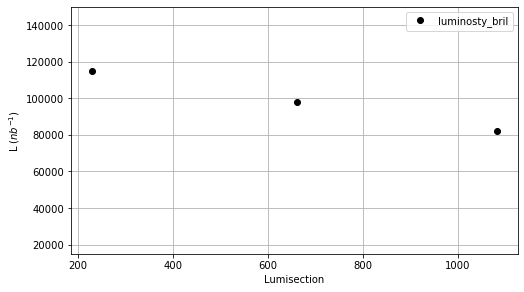

In [3]:
import uproot
import matplotlib.pyplot as plt



# Process the ROOT file
demo_file = "output_resultshlt.root"
with uproot.open(demo_file) as root_file_2:
    uproot_hist = root_file_2["h_mass_2hlt_EE"]
    values, edges_lumisec, edges_mass = uproot_hist.to_numpy()

# Bin ranges for projections
x_bin_start1, x_bin_end1 = 1, 41
x_bin_start2, x_bin_end2 = 41, 81
x_bin_start3, x_bin_end3 = 81, 119

# Calculate midpoints of lumisec bins
lumisec_midpoints = [
    (edges_lumisec[x_bin_start1] + edges_lumisec[x_bin_end1]) / 2,
    (edges_lumisec[x_bin_start2] + edges_lumisec[x_bin_end2]) / 2,
    (edges_lumisec[x_bin_start3] + edges_lumisec[x_bin_end3]) / 2,
]


bril =  [114618.486, 97972.294, 81904.476]

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)

plt.errorbar(lumisec_midpoints,  bril ,fmt='o', color='black',  capsize=5,label="luminosty_bril")


plt.xlabel("Lumisection")
plt.ylabel("L $(nb^{-1})$")
plt.ylim(15000,150000)
plt.grid()
plt.legend()
plt.show()